In [1]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
import mplhep as hep
hep.styles.use("ROOT")
from tqdm import tqdm, trange

%load_ext autoreload
%autoreload 2
import laserball_analysis

In [2]:
ntuple_fname = "/home/jierans/work/eos/EosSimulations/pbomb_515nm.ntuple.root"
pmtinfo = laserball_analysis.PMTInfo(ntuple_fname)
# def digitid_to_lcn(digitid): return pmtinfo['lcn'][digitid]


mc_515nm_data = uproot.open(ntuple_fname)['output']

ntuple_fname = '/home/jierans/work/eos/EosSimulations/pbomb_374nm.ntuple.root'
mc_374nm_data = uproot.open(ntuple_fname)['output']

ntuple_fname = '/home/jierans/work/eos/EosSimulations/pbomb_408nm.ntuple.root'
mc_408nm_data = uproot.open(ntuple_fname)['output']



100%|████████████████████████████████████████████████████████████████████████████████████| 250000/250000 [00:02<00:00, 93689.60event/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 250000/250000 [00:01<00:00, 162669.84event/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 250000/250000 [00:02<00:00, 88230.11event/s]


Text(0, 1, 'Normalized nhit [A.U.]')

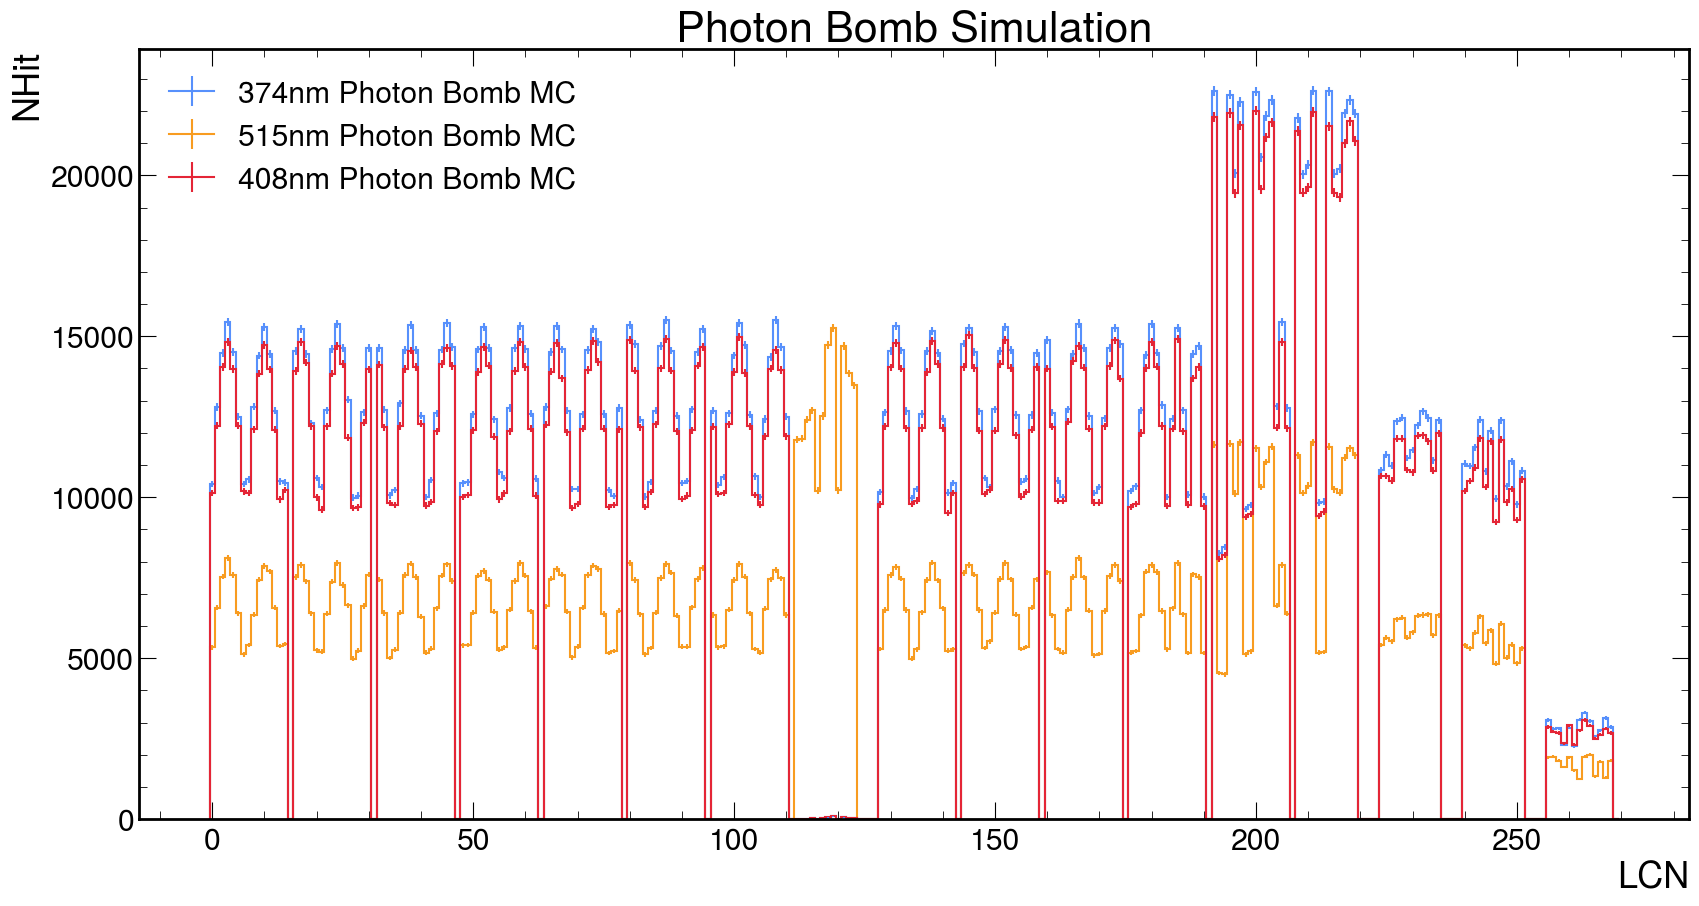

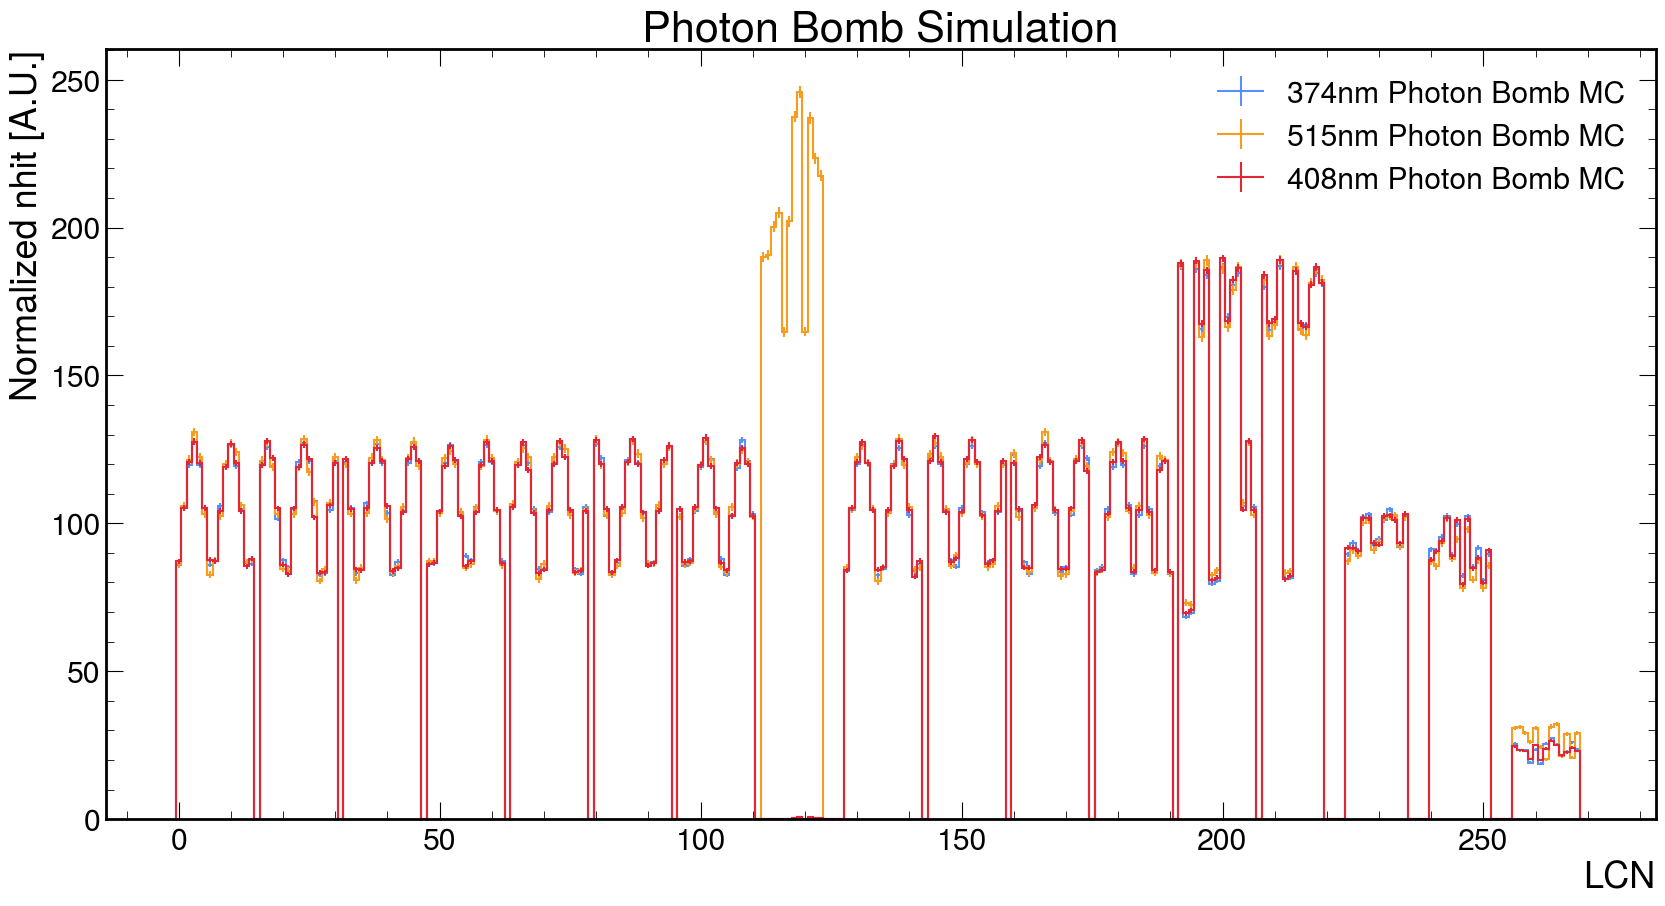

In [4]:
pmts_10inch = pmtinfo.get_lcns_by_type(3)
pmts_8inch = pmtinfo.get_lcns_by_type(0)
pmts_12inch = pmtinfo.get_lcns_by_type(1)


def get_mchits_by_lcn(mcdata):
    hit_histogram = laserball_analysis.aggregate_histogram(mcdata, "mcPMTID",
                                                           bin_params={"bins": np.arange(-0.5, 270.5, 1)},
                                                           flat_transform_func=pmtinfo.id_to_lcn
                                                           )
    return hit_histogram


normalize_to = 100
mc_374nm_nhit = get_mchits_by_lcn(mc_374nm_data)
counts, edges = mc_374nm_nhit
norm_374nm = np.mean(counts[:100])
mc_374nm_nhit_normalized = (mc_374nm_nhit[0] * normalize_to / norm_374nm, edges)


mc_515nm_nhit = get_mchits_by_lcn(mc_515nm_data)
counts, edges = mc_515nm_nhit
norm_515nm = np.mean(counts[:100])
mc_515nm_nhit_normalized = (mc_515nm_nhit[0] * normalize_to / norm_515nm, edges)


mc_408nm_nhit = get_mchits_by_lcn(mc_408nm_data)
counts, edges = mc_408nm_nhit
norm_408nm = np.mean(counts[:100])
mc_408nm_nhit_normalized = (mc_408nm_nhit[0] * normalize_to / norm_408nm, edges)

plt.figure(figsize=(20, 10))
hep.histplot(mc_374nm_nhit, label='374nm Photon Bomb MC', yerr=True)
hep.histplot(mc_515nm_nhit, label='515nm Photon Bomb MC', yerr=True)
hep.histplot(mc_408nm_nhit, label='408nm Photon Bomb MC', yerr=True)
plt.title("Photon Bomb Simulation")
plt.legend()
plt.xlabel("LCN")
plt.ylabel("NHit")

plt.figure(figsize=(20, 10))
hep.histplot(mc_374nm_nhit_normalized, label='374nm Photon Bomb MC',
             w2=(normalize_to / norm_374nm)**2 * mc_374nm_nhit[0], w2method='poisson')
hep.histplot(mc_515nm_nhit_normalized, label='515nm Photon Bomb MC',
             w2=(normalize_to / norm_515nm)**2 * mc_515nm_nhit[0], w2method='poisson')
hep.histplot(mc_408nm_nhit_normalized, label='408nm Photon Bomb MC',
             w2=(normalize_to / norm_408nm)**2 * mc_408nm_nhit[0], w2method="poisson")
plt.title("Photon Bomb Simulation")
plt.legend()
plt.xlabel("LCN")
plt.ylabel("Normalized nhit [A.U.]")

Text(0, 1, 'Normalized nhit [A.U.]')

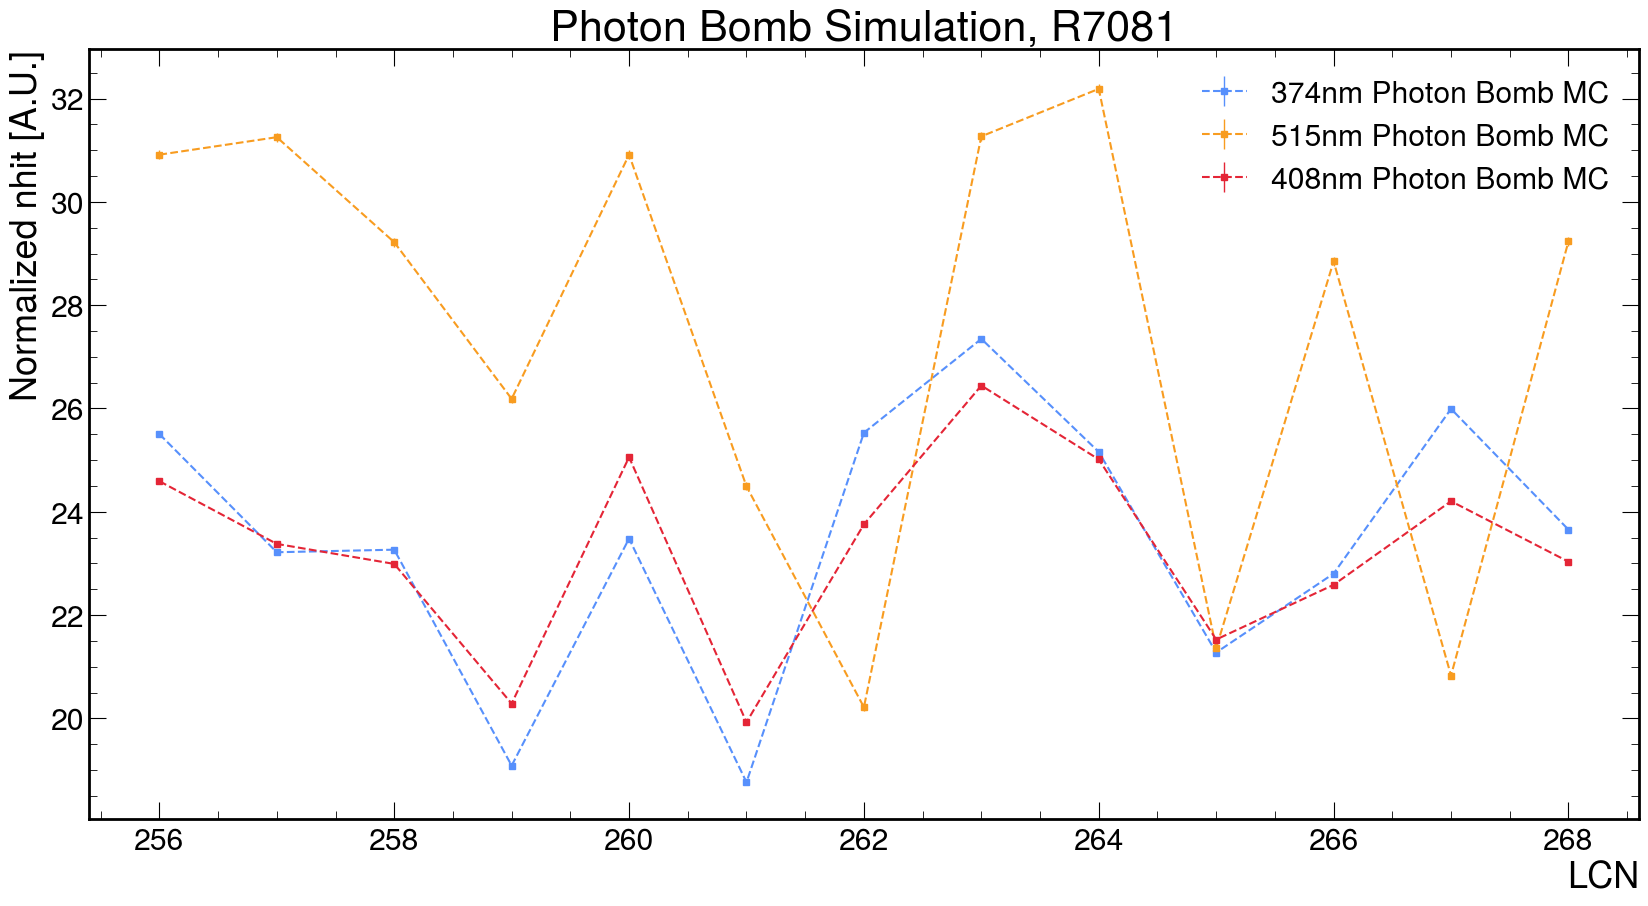

In [5]:
plt.figure(figsize=(20, 10))
edges = mc_374nm_nhit_normalized[1][np.min(pmts_10inch):np.max(pmts_10inch)+2]

histplot_params = {
    "w2method": "poisson",
    "histtype": "errorbar",
    "linestyle": "--",
    "marker": "s",
    "markersize": 4
}

counts = mc_374nm_nhit_normalized[0][pmts_10inch]
hep.histplot(counts, edges, label='374nm Photon Bomb MC',
             w2=(normalize_to / norm_374nm)**2 * counts, **histplot_params)

counts = mc_515nm_nhit_normalized[0][pmts_10inch]
hep.histplot(counts, edges, label='515nm Photon Bomb MC',
             w2=(normalize_to / norm_515nm)**2 * counts, **histplot_params)

counts = mc_408nm_nhit_normalized[0][pmts_10inch]
hep.histplot(counts, edges, label='408nm Photon Bomb MC',
             w2=(normalize_to / norm_408nm)**2 * counts, **histplot_params)

plt.title("Photon Bomb Simulation, R7081")
plt.legend()
plt.xlabel("LCN")
plt.ylabel("Normalized nhit [A.U.]")

In [7]:
ntuple_fname = "/nfs/disk1/users/jierans/eos/eos_run330.ntuple.root"
# pmtinfo = laserball_analysis.get_pmtinfo(ntuple_fname)
data_374nm_data = uproot.open(ntuple_fname)['output']

ntuple_fname = "/nfs/disk1/users/jierans/eos/eos_run460.ntuple.root"
data_408nm_data = uproot.open(ntuple_fname)['output']

ntuple_fname = "/nfs/disk1/users/jierans/eos/eos_run149.ntuple.root"
data_515nm_data = uproot.open(ntuple_fname)['output']


In [10]:
pmts_10inch = pmtinfo.get_lcns_by_type(3)
pmts_8inch = pmtinfo.get_lcns_by_type(0)
pmts_12inch = pmtinfo.get_lcns_by_type(2)


def get_datahits_by_lcn(data):
    hit_histogram = laserball_analysis.aggregate_histogram(data, "digitPMTID",
                                                           bin_params={"bins": np.arange(-0.5, 270.5, 1)},
                                                           flat_transform_func=pmtinfo.id_to_lcn,
                                                           cut_func=lambda batch: batch['digitNCrossings'] == 1
                                                           )
    # counts = np.asarray(hit_histogram[0], dtype=float)
    # counts[counts == 0] = np.nan
    # lcns = 0.5*(hit_histogram[1][:-1] + hit_histogram[1][1:])
    # return counts, hit_histogram[1]
    return hit_histogram


normalize_to = 100


data_374nm_nhit = get_datahits_by_lcn(data_374nm_data)
counts, edges = data_374nm_nhit
norm_374nm = np.mean(counts[:100], where=counts[:100]!=0)
data_374nm_nhit_normalized = (data_374nm_nhit[0] * normalize_to / norm_374nm, edges)


data_515nm_nhit = get_datahits_by_lcn(data_515nm_data)
counts, edges = data_515nm_nhit
norm_515nm = np.mean(counts[:100], where=counts[:100]!=0)
data_515nm_nhit_normalized = (data_515nm_nhit[0] * normalize_to / norm_515nm, edges)


data_408nm_nhit = get_datahits_by_lcn(data_408nm_data)
counts, edges = data_408nm_nhit
norm_408nm = np.mean(counts[:100], where=counts[:100]!=0)
data_408nm_nhit_normalized = (data_408nm_nhit[0] * normalize_to / norm_408nm, edges)



 60%|██████████████████████████████████████████████████▍                                 | 299600/499165 [00:10<00:07, 25259.15event/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 499177/499177 [00:19<00:00, 25094.64event/s]


Text(0, 1, 'Normalized nhit [A.U.]')

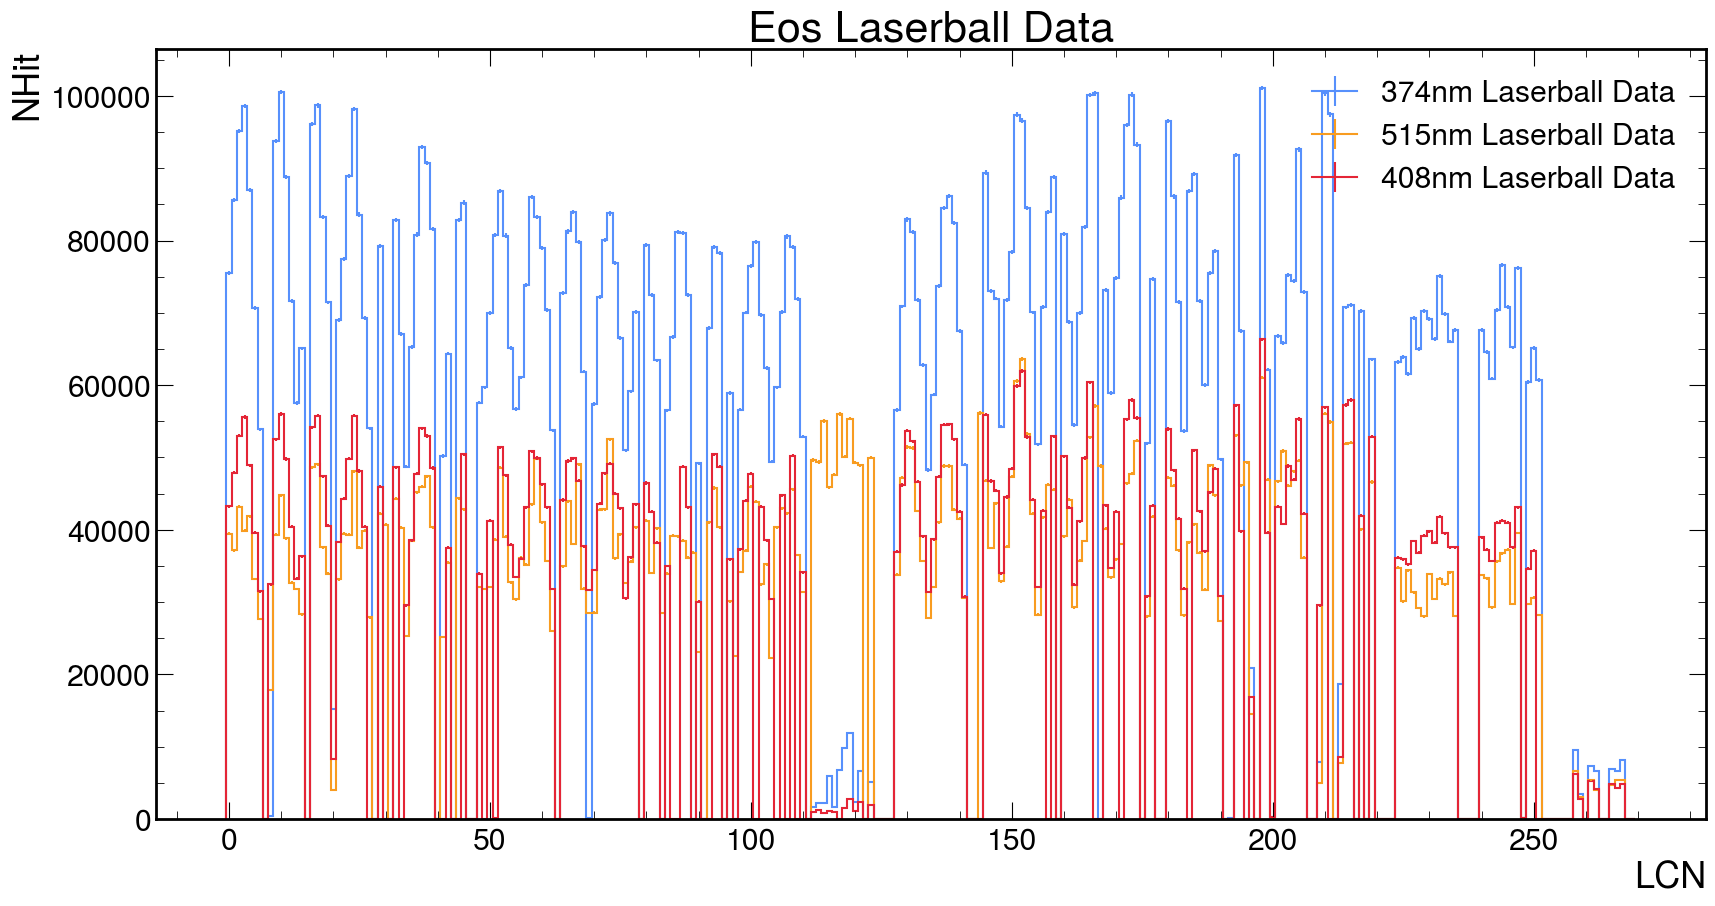

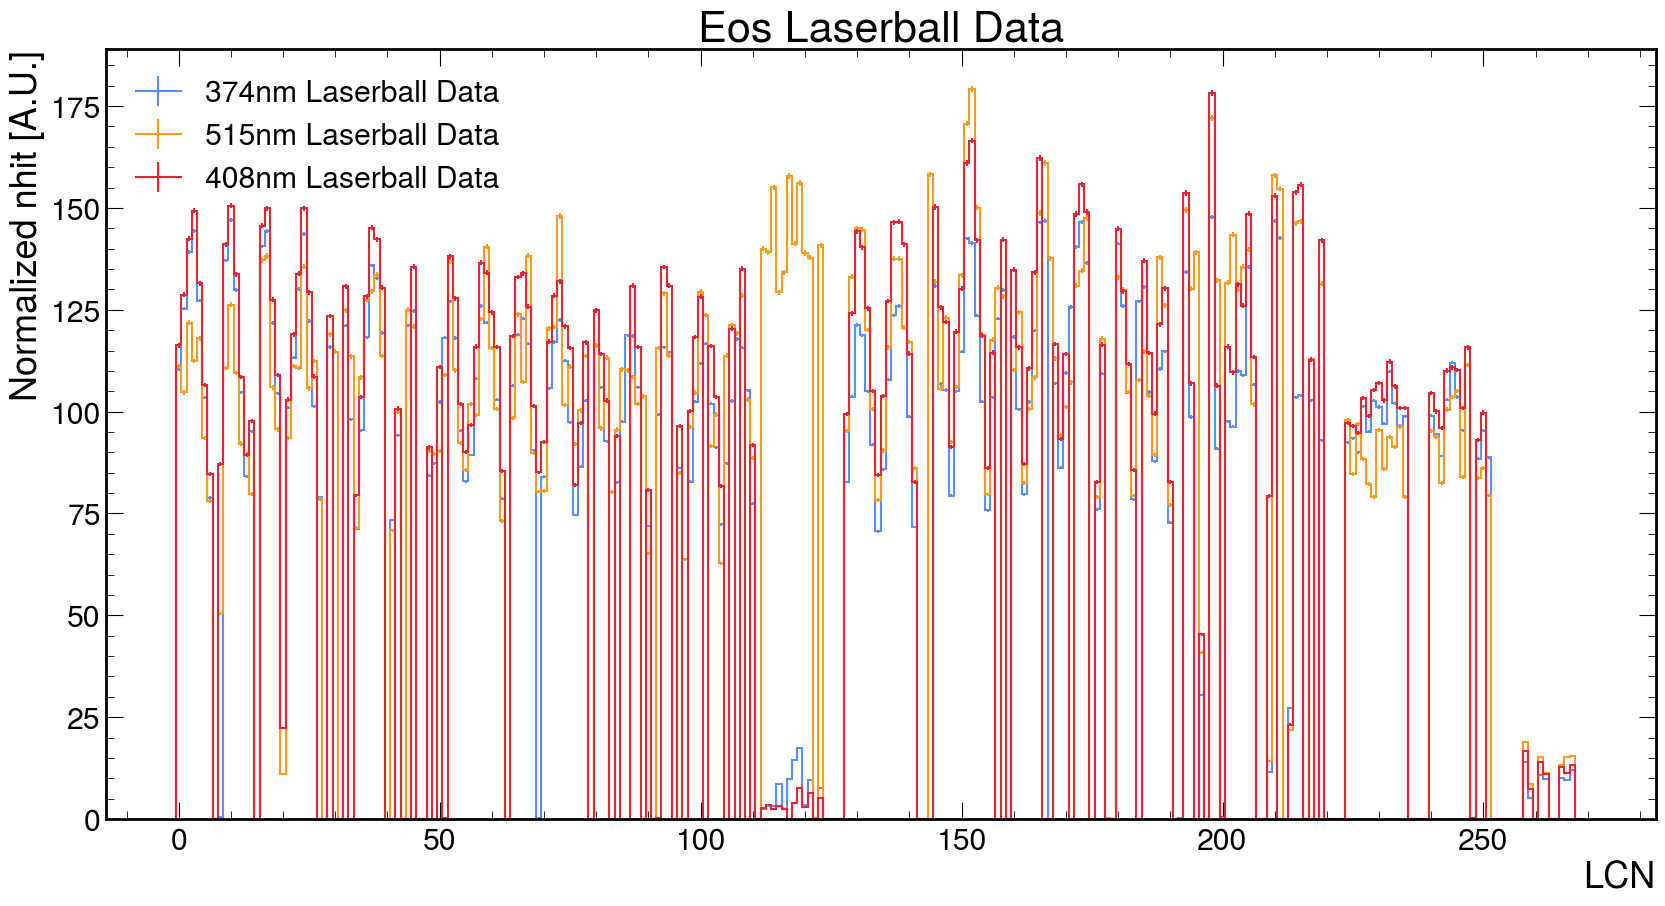

In [11]:
plt.figure(figsize=(20, 10))
hep.histplot(data_374nm_nhit, label='374nm Laserball Data', yerr=True)
hep.histplot(data_515nm_nhit, label='515nm Laserball Data', yerr=True)
hep.histplot(data_408nm_nhit, label='408nm Laserball Data', yerr=True)
plt.title("Eos Laserball Data")
plt.legend()
plt.xlabel("LCN")
plt.ylabel("NHit")

plt.figure(figsize=(20, 10))
hep.histplot(data_374nm_nhit_normalized, label='374nm Laserball Data',
             w2=(normalize_to / norm_374nm)**2 * data_374nm_nhit[0], w2method='poisson')
hep.histplot(data_515nm_nhit_normalized, label='515nm Laserball Data',
             w2=(normalize_to / norm_515nm)**2 * data_515nm_nhit[0], w2method='poisson')
hep.histplot(data_408nm_nhit_normalized, label='408nm Laserball Data',
             w2=(normalize_to / norm_408nm)**2 * data_408nm_nhit[0], w2method="poisson")
plt.title("Eos Laserball Data")
plt.legend()
plt.xlabel("LCN")
plt.ylabel("Normalized nhit [A.U.]")

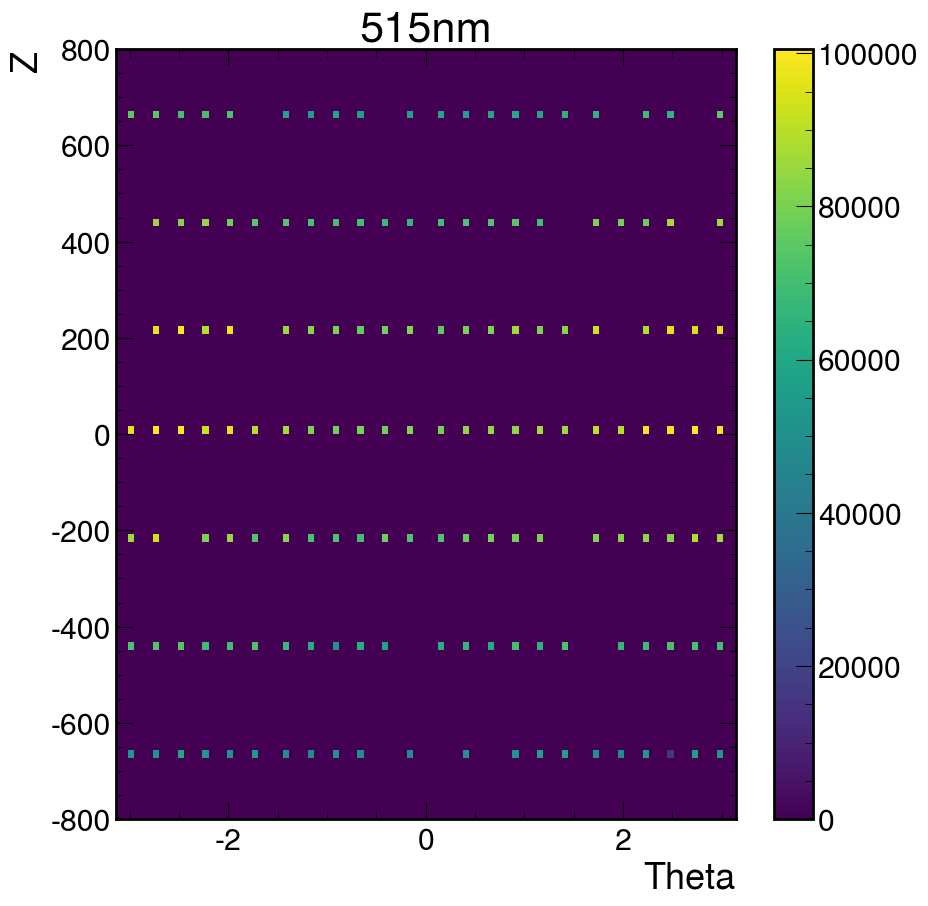

In [12]:
phis = []
zs = []
for lcn, nhit in enumerate(data_374nm_nhit[0]):
    if nhit == 0: continue
    pmt_pos = pmtinfo.pos[pmtinfo.lcn==lcn][0]
    # print(lcn, pmt_pos)
    for i in range(nhit):
        zs.append(pmt_pos[2])
        phis.append(np.arctan2(pmt_pos[1], pmt_pos[0]))

plt.hist2d(phis, zs, bins=100, range=([-np.pi, np.pi], [-800, 800]))
plt.xlabel("Theta")
plt.title("515nm")
plt.ylabel("Z")
plt.colorbar()
plt.show()

Text(0, 1, 'Normalized nhit [A.U.]')

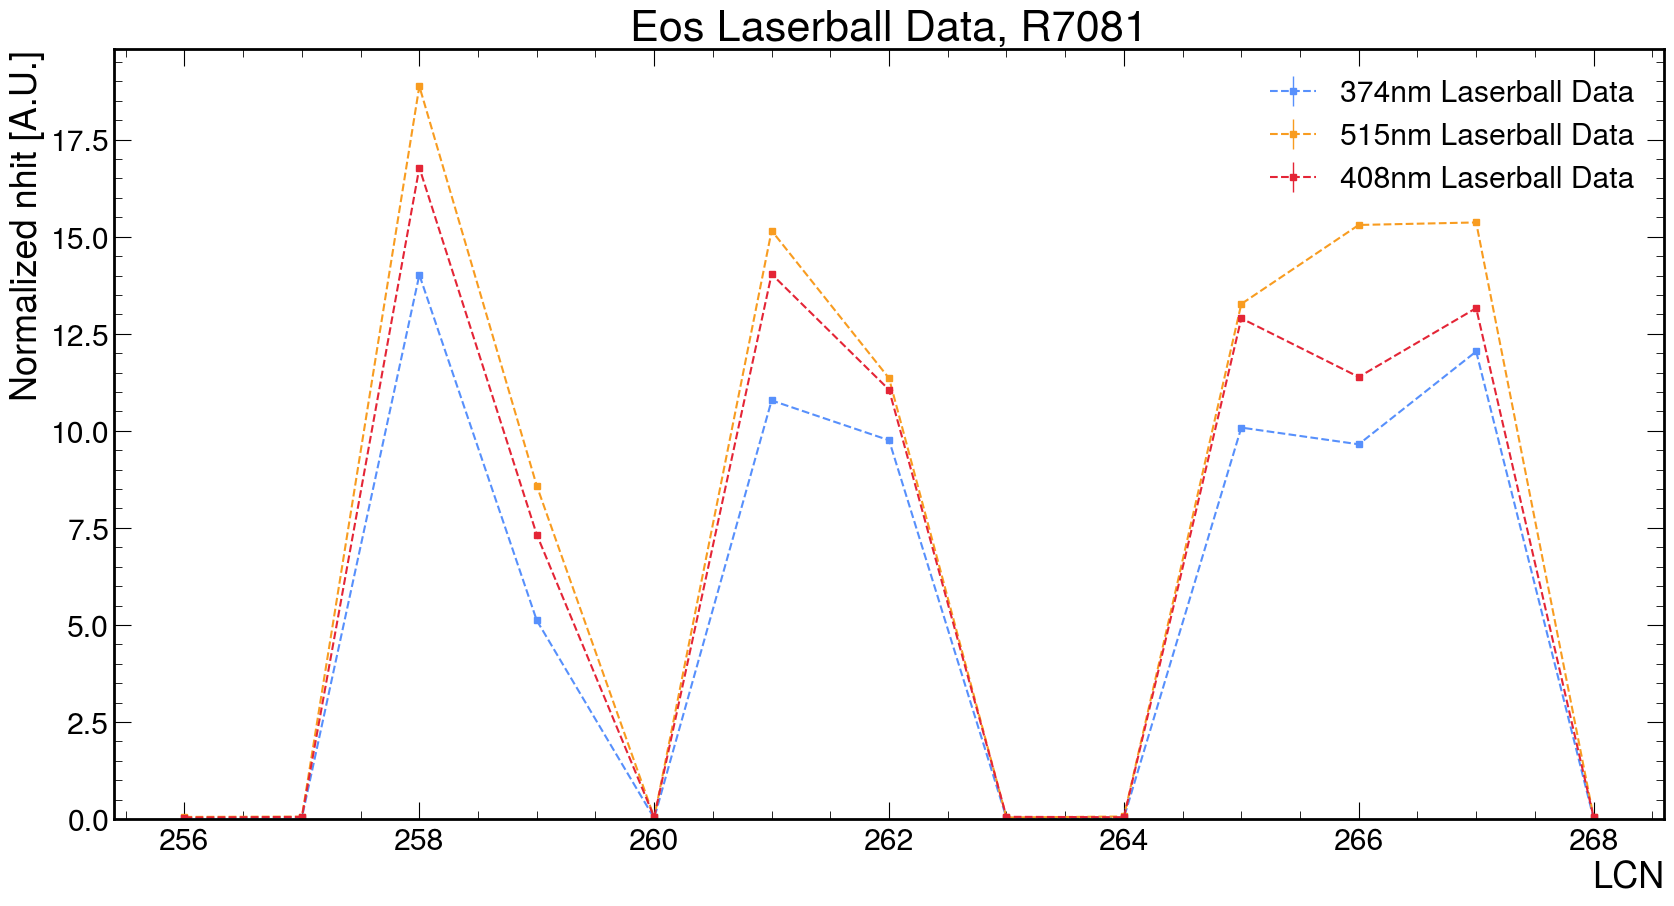

In [13]:
plt.figure(figsize=(20, 10))
edges = data_374nm_nhit_normalized[1][np.min(pmts_10inch):np.max(pmts_10inch)+2]

histplot_params = {
    "w2method": "poisson",
    "histtype": "errorbar",
    "linestyle": "--",
    "marker": "s",
    "markersize": 4
}

counts = data_374nm_nhit_normalized[0][pmts_10inch]
hep.histplot(counts, edges, label='374nm Laserball Data',
             w2=(normalize_to / norm_374nm)**2 * counts, **histplot_params)

counts = data_515nm_nhit_normalized[0][pmts_10inch]
hep.histplot(counts, edges, label='515nm Laserball Data',
             w2=(normalize_to / norm_515nm)**2 * counts, **histplot_params)

counts = data_408nm_nhit_normalized[0][pmts_10inch]
hep.histplot(counts, edges, label='408nm Laserball Data',
             w2=(normalize_to / norm_408nm)**2 * counts, **histplot_params)

plt.title("Eos Laserball Data, R7081")
plt.legend()
plt.xlabel("LCN")
plt.ylabel("Normalized nhit [A.U.]")

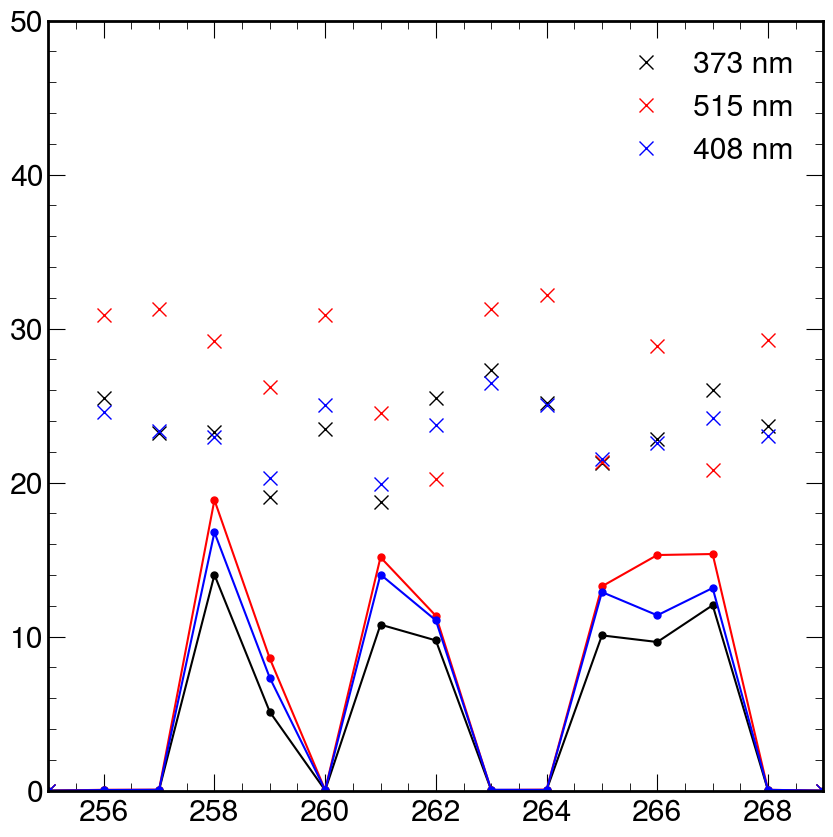

In [55]:
# plt.axhline(mc_374nm_nhit_normalized[0][258])
hep.histplot(mc_374nm_nhit_normalized[0], mc_374nm_nhit_normalized[1],
             linestyle='', histtype='errorbar', color='k', yerr=False, label='373 nm', marker='x')
hep.histplot(data_374nm_nhit_normalized[0], data_374nm_nhit_normalized[1],
             linestyle='-', histtype='errorbar', color='k', yerr=False)

hep.histplot(mc_515nm_nhit_normalized[0], mc_515nm_nhit_normalized[1],
             linestyle='', histtype='errorbar', color='r', yerr=False, label='515 nm', marker='x')
hep.histplot(data_515nm_nhit_normalized[0], data_515nm_nhit_normalized[1],
             linestyle='-', histtype='errorbar', color='r', yerr=False)

hep.histplot(mc_408nm_nhit_normalized[0], mc_408nm_nhit_normalized[1],
             linestyle='', histtype='errorbar', color='b', yerr=False, label='408 nm', marker='x')
hep.histplot(data_408nm_nhit_normalized[0], data_408nm_nhit_normalized[1],
             linestyle='-', histtype='errorbar', color='b', yerr=False)
plt.xlim(255, 269)
plt.ylim(0, 50)
plt.legend()


Text(0, 1, 'Data')

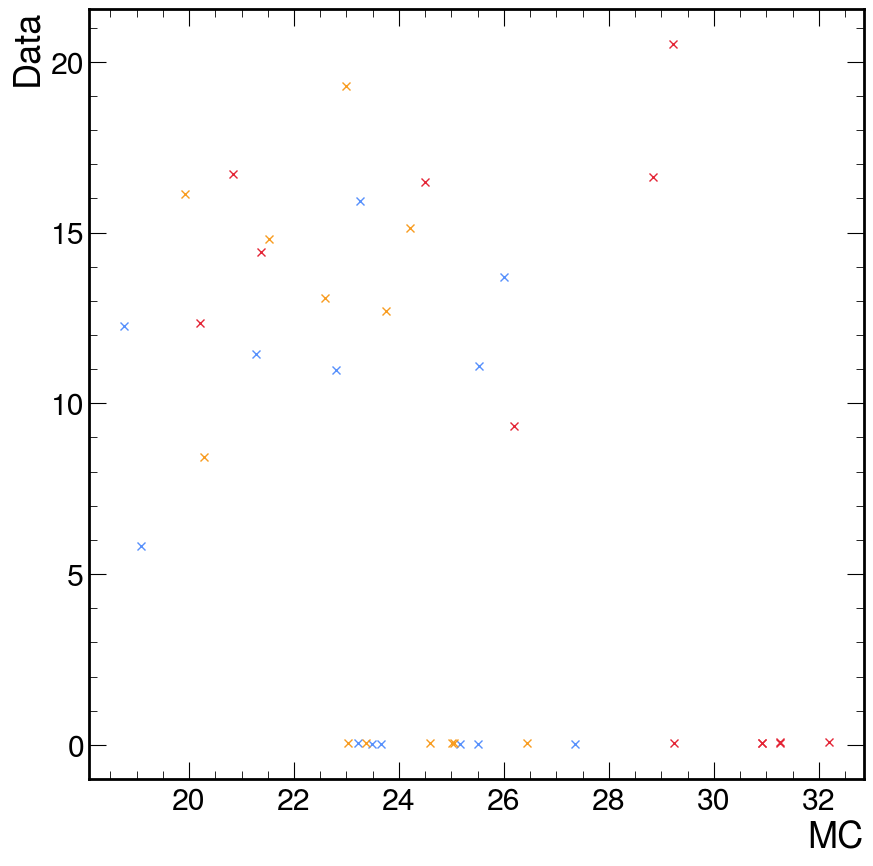

In [43]:
plt.plot(mc_374nm_nhit_normalized[0][256: 269], data_374nm_nhit_normalized[0][256: 269], "x")
plt.plot(mc_408nm_nhit_normalized[0][256: 269], data_408nm_nhit_normalized[0][256: 269], "x")
plt.plot(mc_515nm_nhit_normalized[0][256: 269], data_515nm_nhit_normalized[0][256: 269], "x")
plt.xlabel("MC")
plt.ylabel("Data")

42
43
40


(0.0, 106131.85)

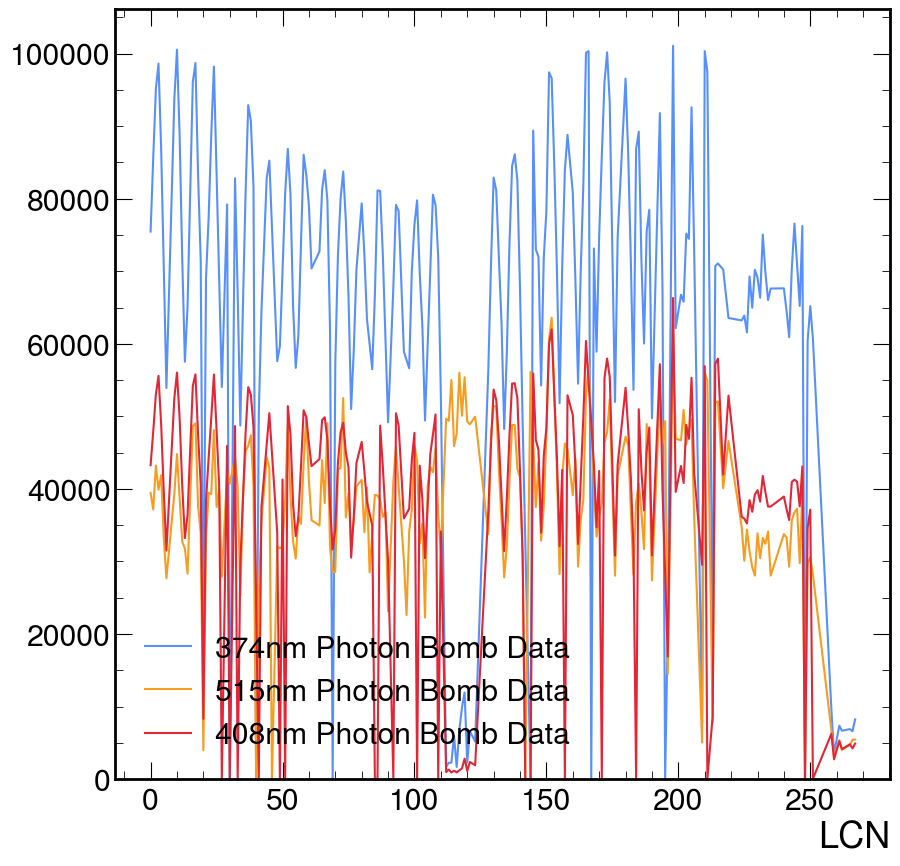

In [4]:
do_scaling = False

pmts_bottom_back = pmtinfo['lcn'][pmtinfo['type']==3]
clean_mask = hit_cleaning_mask(data_374nm_data, pmtinfo)
lcns, counts = laserball_analysis.get_hits_by_lcn(data_374nm_data['digitid'][clean_mask], pmtinfo)
norm_374nm = np.mean(counts[lcns < 100])
good_channel_mask = offset[lcns] != -1
print(len(counts[good_channel_mask & (lcns < 50)]))
norm_374nm = np.mean(counts[good_channel_mask & (lcns < 50)])
plt.plot(lcns[good_channel_mask], counts[good_channel_mask], label='374nm Photon Bomb Data')

clean_mask = hit_cleaning_mask(data_515nm_data, pmtinfo)
lcns, counts = laserball_analysis.get_hits_by_lcn(data_515nm_data['digitid'][clean_mask], pmtinfo)
norm_515nm = np.mean(counts[lcns < 100])
good_channel_mask = offset[lcns] != -1
print(len(counts[good_channel_mask & (lcns < 50)]))
norm_515nm = np.mean(counts[good_channel_mask & lcns < 50])
scaling = (norm_374nm / norm_515nm) if do_scaling else 1.0
plt.plot(lcns[good_channel_mask], counts[good_channel_mask] * scaling, label='515nm Photon Bomb Data')

clean_mask = hit_cleaning_mask(data_408nm_data, pmtinfo)
lcns, counts = laserball_analysis.get_hits_by_lcn(data_408nm_data['digitid'][clean_mask], pmtinfo)
norm_408nm = np.mean(counts[lcns < 100])
good_channel_mask = offset[lcns] != -1
print(len(counts[good_channel_mask & (lcns < 50)]))
norm_408nm = np.mean(counts[good_channel_mask & lcns < 50])
scaling = (norm_374nm / norm_408nm) if do_scaling else 1.0
plt.plot(lcns[good_channel_mask], counts[good_channel_mask] * scaling, label='408nm Photon Bomb Data')
plt.legend()
plt.xlabel("LCN")
plt.ylim(bottom=0.0)

In [9]:
clean_mask = hit_cleaning_mask(data_374nm_data, pmtinfo)
lcns_374nm, counts_374nm = laserball_analysis.get_hits_by_lcn(data_374nm_data['digitid'][clean_mask], pmtinfo)
mask = np.array([l in pmts_bottom_back for l in lcns_374nm])
lcns_374nm = lcns_374nm[mask]
counts_374nm = counts_374nm[mask]
counts_374nm_relerr = 1/np.sqrt(counts_374nm)

clean_mask = hit_cleaning_mask(data_515nm_data, pmtinfo)
lcns_515nm, counts_515nm = laserball_analysis.get_hits_by_lcn(data_515nm_data['digitid'][clean_mask], pmtinfo)
mask = np.array([l in pmts_bottom_back for l in lcns_515nm])
lcns_515nm = lcns_515nm[mask]
counts_515nm = counts_515nm[mask]
counts_515nm_relerr = 1/np.sqrt(counts_515nm)

clean_mask = hit_cleaning_mask(data_408nm_data, pmtinfo)
lcns_408nm, counts_408nm = laserball_analysis.get_hits_by_lcn(data_408nm_data['digitid'][clean_mask], pmtinfo)
mask = np.array([l in pmts_bottom_back for l in lcns_408nm])
lcns_408nm = lcns_408nm[mask]
counts_408nm = counts_408nm[mask]
counts_408nm_relerr = 1/np.sqrt(counts_408nm)
# counts_515nm = counts_515nm * (norm_374nm / norm_515nm)
goodchannel_mask = counts_374nm > 1000
plt.plot(lcns_374nm[goodchannel_mask], counts_374nm[goodchannel_mask], 's--', label='374nm')
plt.plot(lcns_374nm[goodchannel_mask], counts_515nm[goodchannel_mask], 's--', label='515nm')
plt.plot(lcns_374nm[goodchannel_mask], counts_408nm[goodchannel_mask], 's--', label='408nm')
plt.xlabel("LCN")
plt.ylabel("Normalized NHit [A.U.]")
plt.title("Eos Laserball Data")
shadow_ratio_data = counts_515nm / counts_374nm
shadow_ratio_data_lcns = np.array(lcns_374nm)
shadow_ratio_data_err = shadow_ratio_data * (counts_515nm_relerr + counts_374nm_relerr)
plt.legend()
plt.figure()
plt.errorbar(shadow_ratio_data_lcns, shadow_ratio_data, yerr=shadow_ratio_data_err, fmt='ks--')
plt.figure()

x = []
y = []
z = []
for lcn, ratio, relerr in zip(shadow_ratio_data_lcns, shadow_ratio_data, shadow_ratio_data_err):
    if relerr > 0.1: continue
    pmtid = np.argwhere(pmtinfo['lcn']==lcn).item()
    x.append(pmtinfo['pos'][pmtid][0])
    y.append(pmtinfo['pos'][pmtid][1])
    z.append(ratio)
plt.scatter(x, y, s=200, c=z)
plt.xlabel("x[mm]")
plt.xlabel("y[mm]")
plt.title("515nm DigitNhit / 374nm DigitNhit")
plt.colorbar()
plt.ylim(-1000, 1000)
plt.xlim(-1000, 1000)

KeyInFileError: not found: 'ncrossings'

    Available keys: 'digitNCrossings', 'nhits', 'mcid', 'mcpdg', 'mcx', 'mcy', 'mcz', 'mcu', 'mcv', 'mcw', 'mct', 'mcnhits', 'cherPhotons', 'mcPEProcess', 'mcke', 'evid', 'remPhotons', 'subev', 'scintEdep', 'mcpecount', 'mcPEx'...

in file /nfs/disk1/users/jierans/eos/eos_run330.ntuple.root
in object /output;11

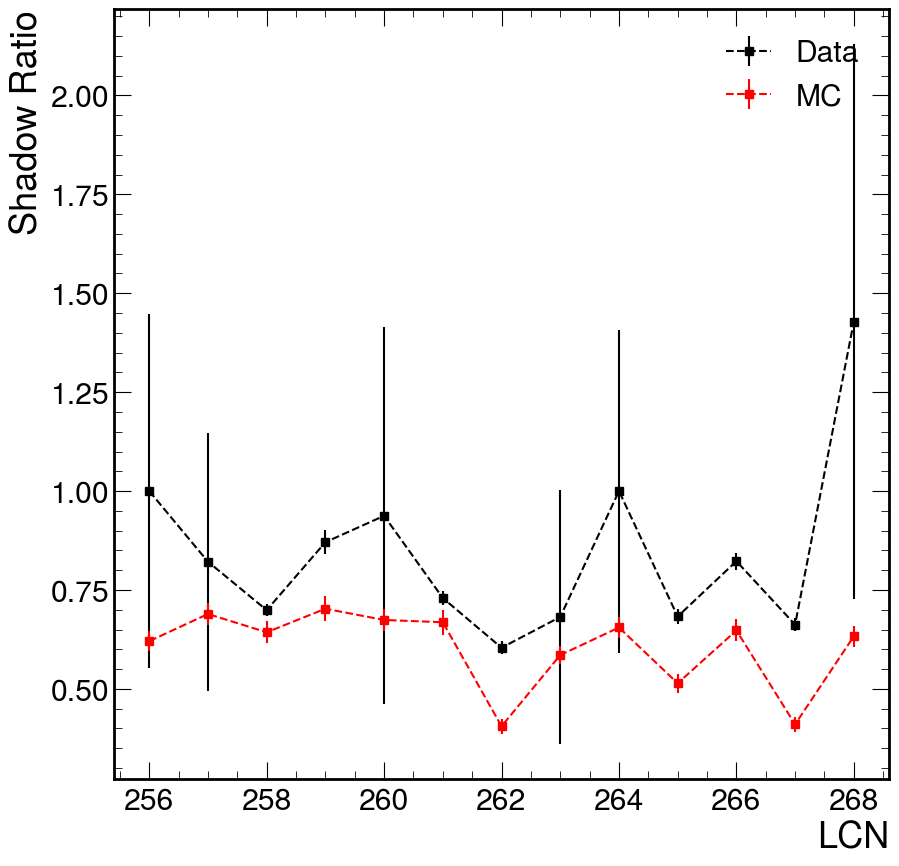

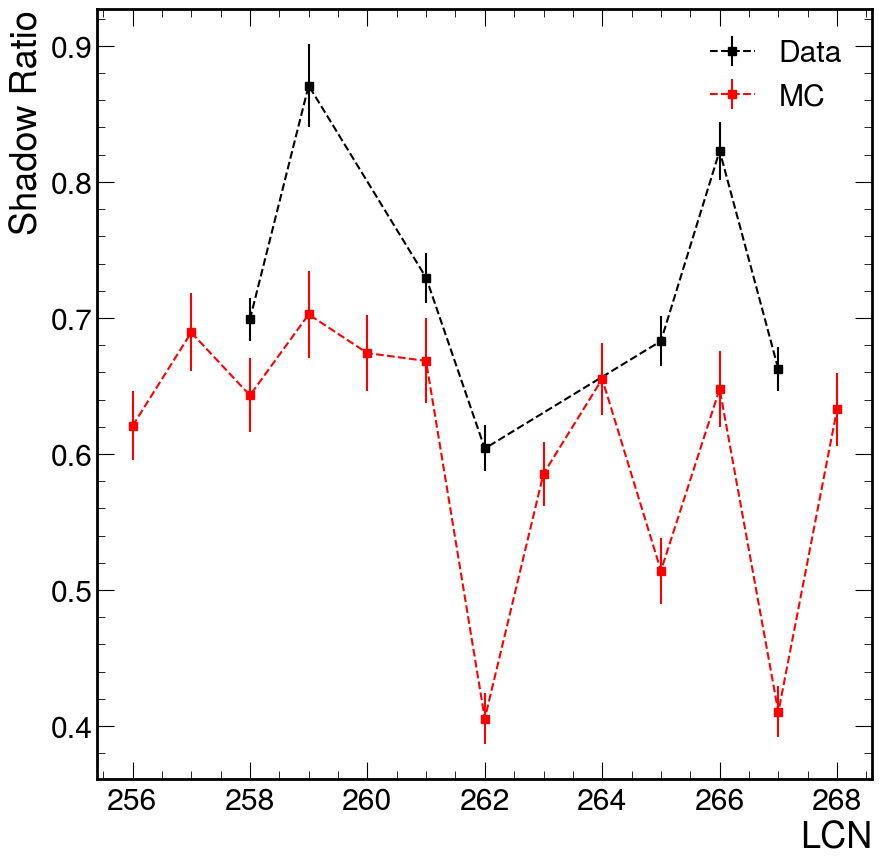

In [7]:
plt.errorbar(shadow_ratio_data_lcns, shadow_ratio_data, yerr=shadow_ratio_data_err, fmt='ks--', label='Data')
plt.errorbar(shadow_ratio_mc_lcns, shadow_ratio_mc, yerr=shadow_ratio_mc_err, fmt='rs--', label="MC")
plt.xlabel("LCN")
plt.ylabel("Shadow Ratio")
plt.legend()

plt.figure()
mask = shadow_ratio_data_err < 0.1
plt.errorbar(shadow_ratio_data_lcns[mask], shadow_ratio_data[mask], yerr=shadow_ratio_data_err[mask], fmt='ks--', label='Data')
plt.errorbar(shadow_ratio_mc_lcns, shadow_ratio_mc, yerr=shadow_ratio_mc_err, fmt='rs--', label="MC")
plt.xlabel("LCN")
plt.ylabel("Shadow Ratio")
plt.legend()

# PMT Charge Distributions

In [3]:
ntuple_fname = "/nfs/disk1/users/jierans/eos/eos_run330_shortint_longped.ntuple.root"
pmtinfo = laserball_analysis.get_pmtinfo(ntuple_fname)
data_374nm_data = laserball_analysis.get_flat_arrays(ntuple_fname, pmtinfo)

[]

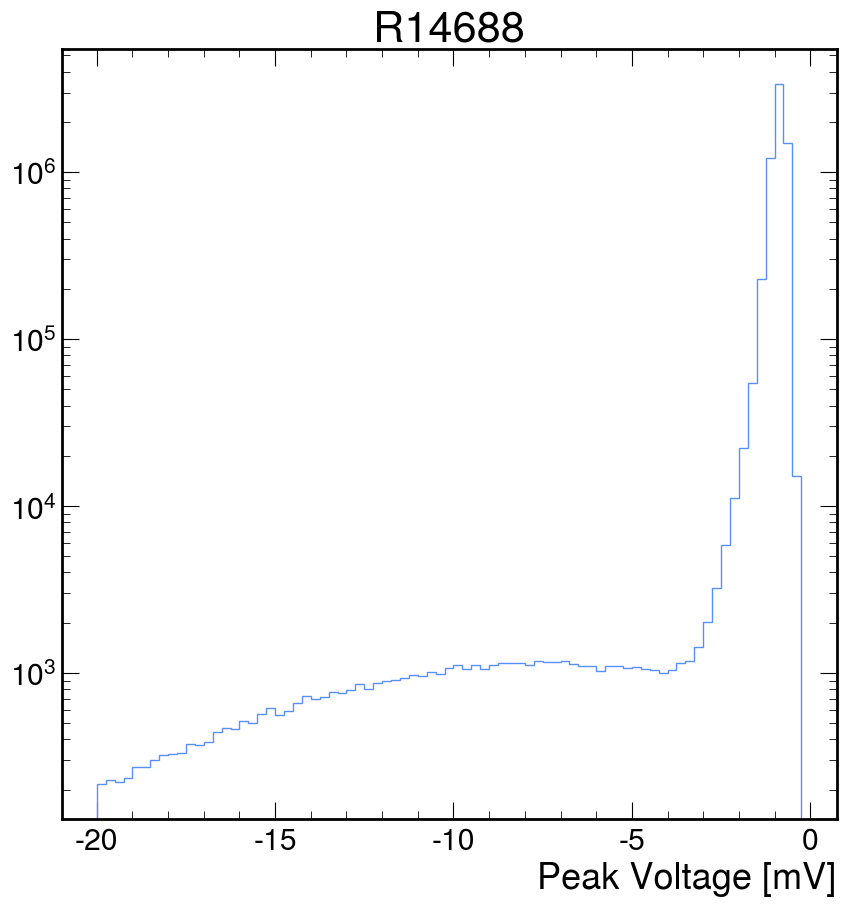

In [6]:
from scipy.optimize import curve_fit
digitPeaks = data_374nm_data['digitPeak']
mask = pmtinfo['type'][data_374nm_data['digitid']] == 3
# mask = mask & (data_374nm_data['digitCharge'] > 1.2)
y, xedge, _ = plt.hist(digitPeaks[mask], bins=np.arange(-20, -0, 0.25), histtype='step')
x = (xedge[:-1] + xedge[1:])/2

# def model(x, tau, u, s, a1, a2):
#     return a1 * np.exp(x/tau) + a2 * np.exp(-0.5*((x-u)/s)**2)

# def gaus(x, u, s, a):
#     return a * np.exp(-0.5*((x-u)/s)**2)

# def gaus_zero(x, s, a):
#     return a * np.exp(-0.5*((x)/s)**2)

# result, cov = curve_fit(gaus_zero, x, y, p0=(5, 1e7))
# plt.xlim(-5, 0)
# plt.ylim(1e3, 1e7)
# # result, cov = curve_fit(model, x, y, p0=(0.25, -18, 7.5, 2e9, 2.5e5), bounds=([0, -20, 5, 0, 1e5], [0.5, -16, 10, np.inf, 1e6]))
# print(result)
# plt.plot(x, gaus_zero(x, *result), "r--")
plt.xlabel("Peak Voltage [mV]")
plt.title("R14688")
plt.semilogy()


[]

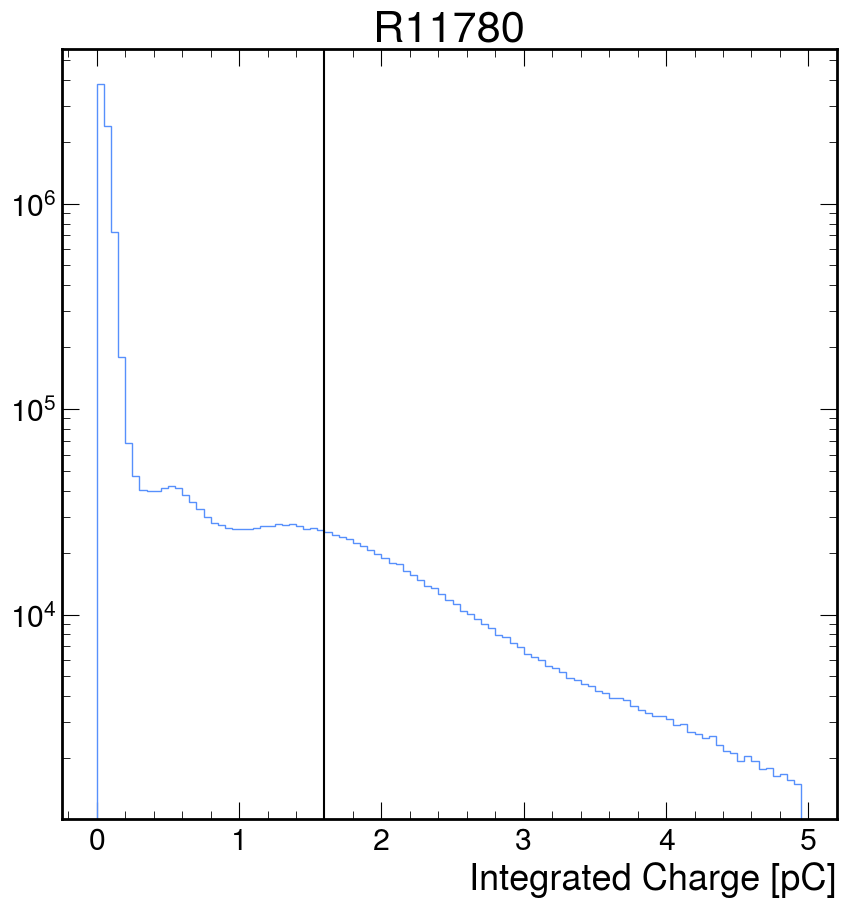

In [9]:
pmttype=2
if pmttype==0:
    plt.title("R14688")
elif pmttype==2:
    plt.title("R11780")
elif pmttype == 3:
    plt.title("R7081")
mask = pmtinfo['type'][data_374nm_data['digitid']] == pmttype
plt.hist(data_374nm_data['digitCharge'][mask], bins=np.arange(0, 5, 0.05), histtype='step')
plt.axvline(1.6, color='k')
plt.xlabel("Integrated Charge [pC]")
plt.semilogy()